In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import time
from xgboost import XGBRegressor

In [2]:
df=pd.read_excel(r"../dataset/data.xlsx",sheet_name="Sheet1")
df

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350
...,...,...,...,...,...,...,...
4021,22,66,6,6.0,50,25.00,1.628000
4022,22,66,6,6.0,75,25.00,2.714000
4023,22,66,6,6.0,100,25.00,2.879000
4024,22,66,6,7.5,0,25.00,0.602680


In [3]:
df.shape

(4026, 7)

In [4]:
df.head()

,Number of Storeys(NS),Height of Structure(HS),Number of Spans(HSP),Length of Spans (LS),Opening percentage (OP),Masonry wall Stiffeness Et (MS),Period (P)
0,1,3,2,3.0,0,2.25,0.092970
1,1,3,2,3.0,100,2.25,0.159750
2,1,3,2,4.5,0,2.25,0.094770
3,1,3,2,4.5,100,2.25,0.156589
4,1,3,2,6.0,0,2.25,0.106350


In [5]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
normalized_data = scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
print(normalized_df)

      Number of Storeys(NS)  Height of Structure(HS)  Number of Spans(HSP)  \
0                       0.0                      0.0                   0.0   
1                       0.0                      0.0                   0.0   
2                       0.0                      0.0                   0.0   
3                       0.0                      0.0                   0.0   
4                       0.0                      0.0                   0.0   
...                     ...                      ...                   ...   
4021                    1.0                      1.0                   1.0   
4022                    1.0                      1.0                   1.0   
4023                    1.0                      1.0                   1.0   
4024                    1.0                      1.0                   1.0   
4025                    1.0                      1.0                   1.0   

      Length of Spans (LS)  Opening percentage (OP)  \
0       

In [6]:
normalized_df.keys()

Index(['Number of Storeys(NS)', 'Height of Structure(HS)',
       'Number of Spans(HSP)', 'Length of Spans (LS)',
       'Opening percentage (OP)', 'Masonry wall Stiffeness Et (MS)',
       'Period (P)'],
      dtype='object')

In [7]:
X=normalized_df.drop("Period (P)" ,axis=1)

In [8]:
y=normalized_df["Period (P)"]

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.25, random_state=99)

# XGBoost

In [10]:
import optuna
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split, KFold
import optuna.integration.lightgbm as oplgb
import xgboost as xgb

In [ ]:
import optuna
import xgboost as xgb
from sklearn.model_selection import train_test_split
def objective(trial):

    param = {
        'objective': 'reg:squarederror',
        'max_depth': trial.suggest_int('max_depth', 2, 10),
        'subsample': trial.suggest_uniform('subsample', 0.001, 1),
        'learning_rate': trial.suggest_uniform('learning_rate', 0.001,0.999),
        'n_estimators':trial.suggest_int('n_estimators',800,5000),
    }


    dtrain = xgb.DMatrix(X_train, label=y_train)
    dtest = xgb.DMatrix(X_test, label=y_test)
    bst = xgb.train(param, dtrain, evals=[(dtest, 'eval')], num_boost_round=1000, early_stopping_rounds=10, verbose_eval=100)
    pred = bst.predict(dtest)
    score = mean_squared_error(y_test, pred)
    
    return score
# Start time
start_time = time.time()
study = optuna.create_study(direction='minimize')
study.optimize(objective, n_trials=100)
# End time
end_time = time.time()
# Calculate total time
total_time = end_time - start_time
print("Total time taken: ", total_time)
print('Best trial: score={},\nparams={}'.format(study.best_trial.value, study.best_trial.params))


In [ ]:
Total time taken:  106.22981834411621
Best trial: score=2.0431663565770793e-05,
params={'max_depth': 5, 'subsample': 0.815169987861234, 'learning_rate': 0.17159630482496005, 'n_estimators': 4343}

In [12]:
import xgboost as xgb
params_best['max_depth'] = int(params_best['max_depth'])
params_best['n_estimators'] = int(params_best['n_estimators'])
params_best['subsample'] = int(params_best['subsample'])
xgb_reg= XGBRegressor(**best_params)
xgb_reg.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1716, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=4343, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [13]:
from math import sqrt
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [14]:
y_pred=xgb_reg.predict(X_test)
y_pred1=xgb_reg.predict(X_val)
y_pred2=xgb_reg.predict(X_train)

In [15]:
print("mean_absolute_error:", mean_absolute_error(y_val, y_pred1))
print("mean_squared_error:", mean_squared_error(y_val, y_pred1))
print("rmse:", sqrt(mean_squared_error(y_val, y_pred1)))
print("r2 score:", r2_score(y_val, y_pred1))

mean_absolute_error: 0.001861911470483312
mean_squared_error: 7.762731663865014e-06
rmse: 0.0027861679173849184
r2 score: 0.9998443057170429


In [16]:
print("mean_absolute_error:", mean_absolute_error(y_train, y_pred2))
print("mean_squared_error:", mean_squared_error(y_train, y_pred2))
print("rmse:", sqrt(mean_squared_error(y_train, y_pred2)))
print("r2 score:", r2_score(y_train, y_pred2))

mean_absolute_error: 0.0007293786694044539
mean_squared_error: 1.9350685978022184e-06
rmse: 0.00139106743107666
r2 score: 0.9999604404187528


In [17]:
print("mean_absolute_error:", mean_absolute_error(y_test, y_pred))
print("mean_squared_error:", mean_squared_error(y_test, y_pred))
print("rmse:", sqrt(mean_squared_error(y_test, y_pred)))
print("r2 score:", r2_score(y_test, y_pred))

mean_absolute_error: 0.0018382201987679394
mean_squared_error: 1.628442878858674e-05
rmse: 0.004035396980296578
r2 score: 0.9996821351190646


In [20]:
from yellowbrick.regressor import PredictionError

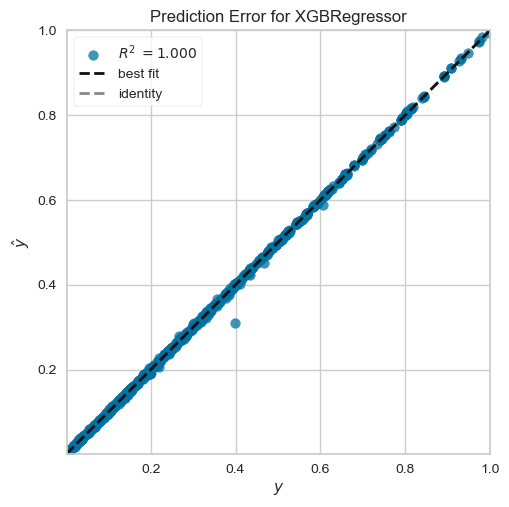

<Axes: title={'center': 'Prediction Error for XGBRegressor'}, xlabel='$y$', ylabel='$\\hat{y}$'>

In [21]:
visualizer = PredictionError(xgb_reg)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

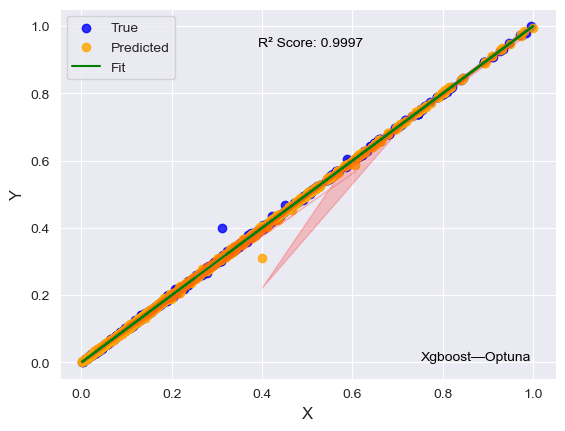

In [19]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
from scipy import stats
r2 = r2_score(y_test, y_pred)
slope, intercept, _, _, _ = stats.linregress(y_test, y_pred)
fit_line = intercept + slope * y_test
sns.set_style('darkgrid')
sns.regplot(x=y_pred, y=y_test, label='True', scatter_kws={'color': 'blue'})
sns.regplot(x=y_test, y=y_pred, label='Predicted', scatter_kws={'color': 'orange'})
plt.plot(y_test, fit_line, label='Fit', color='green')
plt.fill_between(y_test, y_pred - (y_pred - y_test), y_pred + (y_pred - y_test), alpha=0.2, color='red')
plt.xlabel('X', fontsize=12)
plt.ylabel('Y', fontsize=12)
plt.legend()
plt.text(0.95, 0.05, 'Xgboost—Optuna', transform=plt.gca().transAxes, ha='right', color='black')
plt.text(0.4, 0.9, f'R² Score: {r2:.4f}', transform=plt.gca().transAxes, ha='left', color='black')
plt.show()